# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


C:\Users\abhis\anaconda3\lib\site-packages\nbformat\__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


In [3]:
import import_ipynb
from HyperMainVenus import * 

importing Jupyter notebook from HyperMainVenus.ipynb
For:Sand-> ['L1r2', 0.19, 'Spec:', 'log', 'bands: 11'] :mult
For:Sand-> ['L1r2', 0.33, 'Spec:', 'log', 'bands: 11'] :plsr
For:Sand-> ['L1r2', 0.33, 'Spec:', 'log', 'bands: 11'] :svr
For:Sand-> ['L1r2', 0.35, 'Spec:', 'log', 'bands: 11'] :ridge
For:Sand-> ['L1r2', 0.31, 'Spec:', 'fod2', 'bands: 11'] :cubist
For:Sand-> ['L1r2', 0.35, 'Spec:', 'fod2', 'bands: 11'] :gbrt
For:Silt-> ['L1r2', 0.15, 'Spec:', 'log', 'bands: 11'] :mult
For:Silt-> ['L1r2', 0.18, 'Spec:', 'log', 'bands: 11'] :plsr
For:Silt-> ['L1r2', 0.22, 'Spec:', 'log', 'bands: 11'] :svr
For:Silt-> ['L1r2', 0.1, 'Spec:', 'log', 'bands: 11'] :ridge
For:Silt-> ['L1r2', 0.2, 'Spec:', 'log', 'bands: 11'] :cubist
For:Silt-> ['L1r2', 0.34, 'Spec:', 'fod2', 'bands: 11'] :gbrt
For:Clay-> ['L1r2', 0.12, 'Spec:', 'log', 'bands: 11'] :mult
For:Clay-> ['L1r2', 0.49, 'Spec:', 'log', 'bands: 11'] :plsr
For:Clay-> ['L1r2', 0.42, 'Spec:', 'log', 'bands: 11'] :svr
For:Clay-> ['L1r2', 0.33, 'S

interactive(children=(Dropdown(description='method', options=('mult', 'plsr', 'svr', 'ridge', 'cubist', 'gbrt'…

## Loading  Mtree 

In [4]:
with open ('HMtreeVen.pickle', 'rb') as file:
    HMtreeVen = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [5]:
feature_scores = {}

model_details ={}

{'bp': {'alpha': 0.1},
 'X_test':        420       443       490       555       638       672       702    \
 76  2.105781  1.941337  1.708544  1.311004  1.010788  0.948885  0.894317   
 0   2.956642  2.845013  2.654726  2.166415  1.606982  1.499015  1.403496   
 71  2.199930  2.037972  1.806512  1.397557  1.084544  1.017538  0.958174   
 23  2.721476  2.628475  2.476114  2.192512  1.864993  1.783487  1.708708   
 12  2.285064  2.148057  1.936911  1.570548  1.228969  1.157617  1.094715   
 57  1.243068  1.100993  0.908501  0.598709  0.400861  0.358162  0.320084   
 10  1.830807  1.643816  1.416611  0.968330  0.693018  0.634078  0.585455   
 19  1.446904  1.378428  1.268948  1.115073  0.966726  0.912237  0.863412   
 4   2.923435  2.778524  2.586062  2.096358  1.653602  1.591517  1.533721   
 68  1.401889  1.252096  1.049578  0.708211  0.474608  0.431646  0.394759   
 62  1.759063  1.695092  1.585088  1.436832  1.279313  1.217626  1.161250   
 65  1.893885  1.810224  1.678982  1.504968

##  Sand 

### Gradient Boosting Regression Tree

Sand -> [ r2 - **0.35**, Spec - fod2, n_bands -11]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the  smoothed spectra which was resampled to the 11 bands provided by Venus.

In [7]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42) 
sand_model_gbrt.fit(fod_sampled11,  T[0])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [8]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled11, T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

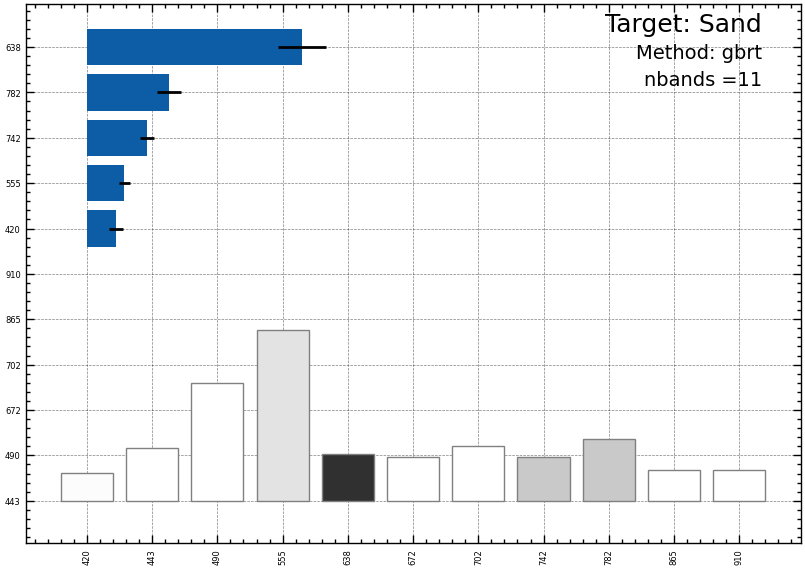

In [13]:
show_important_features_for ('Sand', model_details, feature_scores, 6, 60, 20)

### Kernel Ridge

Sand -> [ r2 - **0.35**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for sand using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra and resampled it to the 11 bands provided by Venus.


In [15]:
sand_model_kernelridge = KernelRidge(alpha = 0.1) 
sand_model_kernelridge.fit(sampled_log11,  T[0])

KernelRidge(alpha=0.1)

In [16]:
feature_scores['Sand'] = permutation_importance(sand_model_kernelridge, sampled_log11, T[0], n_repeats=20, random_state=0)

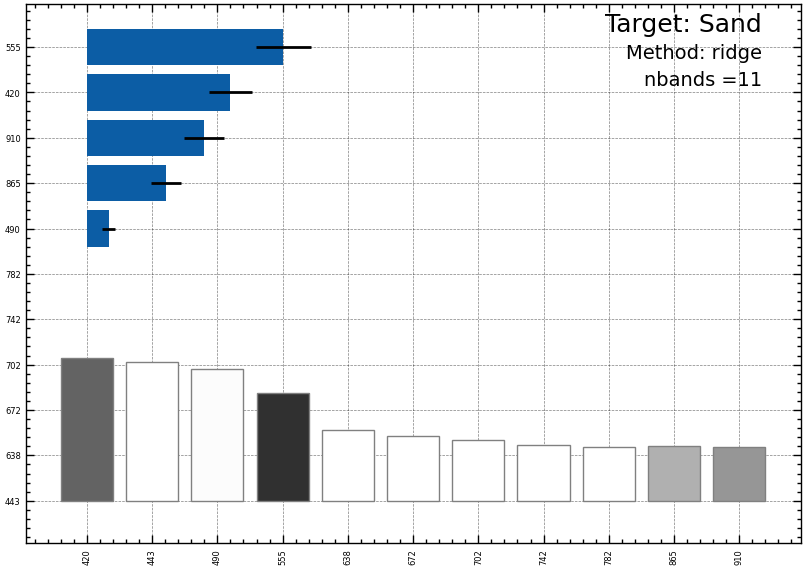

In [20]:
model_details['Sand'] = {'method': 'ridge', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}
show_important_features_for ('Sand', model_details, feature_scores, 1.5, 1, 2)

##  Silt 

{'bp': {'C': 10, 'gamma': 1, 'kernel': 'rbf'},
 'X_test':        420       443       490       555       638       672       702    \
 76  2.105781  1.941337  1.708544  1.311004  1.010788  0.948885  0.894317   
 0   2.956642  2.845013  2.654726  2.166415  1.606982  1.499015  1.403496   
 71  2.199930  2.037972  1.806512  1.397557  1.084544  1.017538  0.958174   
 23  2.721476  2.628475  2.476114  2.192512  1.864993  1.783487  1.708708   
 12  2.285064  2.148057  1.936911  1.570548  1.228969  1.157617  1.094715   
 57  1.243068  1.100993  0.908501  0.598709  0.400861  0.358162  0.320084   
 10  1.830807  1.643816  1.416611  0.968330  0.693018  0.634078  0.585455   
 19  1.446904  1.378428  1.268948  1.115073  0.966726  0.912237  0.863412   
 4   2.923435  2.778524  2.586062  2.096358  1.653602  1.591517  1.533721   
 68  1.401889  1.252096  1.049578  0.708211  0.474608  0.431646  0.394759   
 62  1.759063  1.695092  1.585088  1.436832  1.279313  1.217626  1.161250   
 65  1.893885  1.81

### Gradient Boosting Regression Tree

Silt -> [ r2 - **0.34**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra and it is resampled to the 11 bands provided by Venus.


In [22]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42)  
silt_model_gbrt.fit(fod_sampled11,  T[1])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [23]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled11, T[1], n_repeats=20, random_state=0)

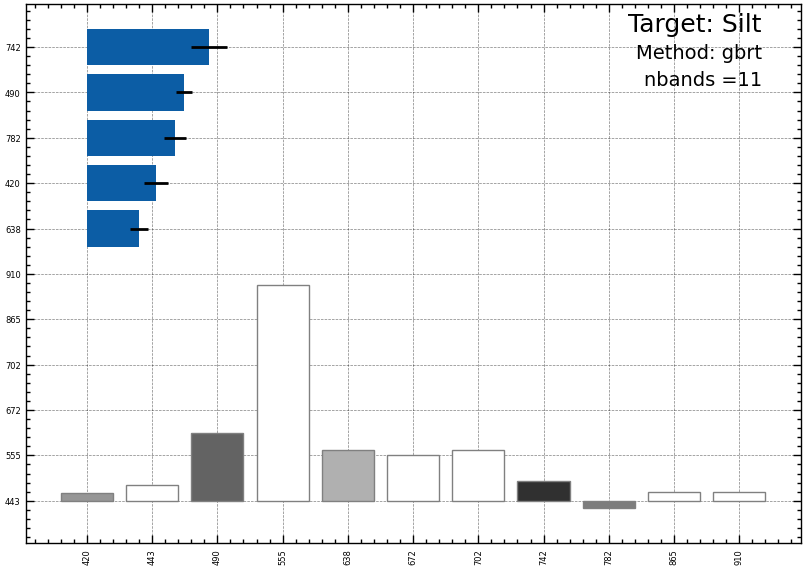

In [26]:
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}
show_important_features_for ('Silt', model_details, feature_scores, 6, 40, 2)

### SVR

Silt -> [ r2 - **0.22**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra and it is resampled to the 11 bands provided by Venus.


In [28]:
silt_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf')
silt_model_svr.fit(sampled_log11,  T[1])

SVR(C=10, gamma=1)

In [29]:
feature_scores['Silt'] = permutation_importance(silt_model_svr, sampled_log11, T[1], n_repeats=10, random_state=0)

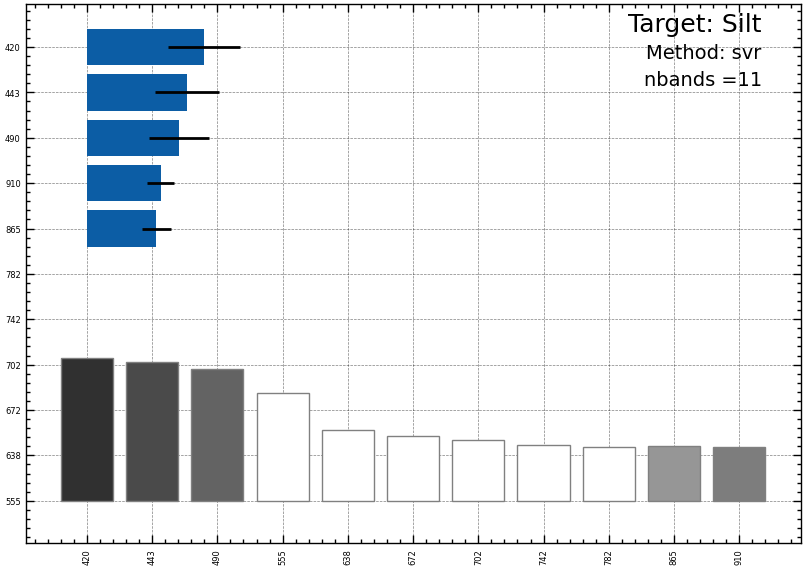

In [34]:
model_details['Silt'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}
show_important_features_for ('Silt', model_details, feature_scores, 8, 1, 2)

## Clay 

{'bp': {'n_committees': 10, 'n_rules': 10},
 'X_test':        420       443       490       555       638       672       702    \
 76  0.022125  0.037200  0.088550  0.094208  0.023229  0.021729  0.025583   
 0   0.006234  0.012102  0.044465  0.085732  0.022833  0.022417  0.027896   
 71  0.019808  0.033575  0.083100  0.090683  0.023417  0.022125  0.026187   
 23  0.006473  0.011812  0.027615  0.043217  0.013146  0.013063  0.016688   
 12  0.015167  0.027200  0.063900  0.084525  0.021625  0.020417  0.025146   
 57  0.044582  0.069901  0.146504  0.120035  0.029208  0.027140  0.028633   
 10  0.033513  0.048650  0.137326  0.120110  0.030344  0.026440  0.031033   
 19  0.016768  0.029034  0.046773  0.052419  0.021294  0.020109  0.024889   
 4   0.008523  0.013047  0.047750  0.068275  0.012250  0.012125  0.014187   
 68  0.040317  0.063521  0.142588  0.129374  0.027300  0.024414  0.026372   
 62  0.011433  0.021275  0.032752  0.040549  0.017695  0.017178  0.023078   
 65  0.013218  0.02283

### PLSR

Clay -> [ r2 - **0.49**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra and it is resampled to the 11 bands provided by Venus.


In [36]:
clay_model_plsr = PLSRegression(n_components=4, scale=True)  
clay_model_plsr.fit(sampled_log11,  T[2])

PLSRegression(n_components=4)

In [37]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log11, T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

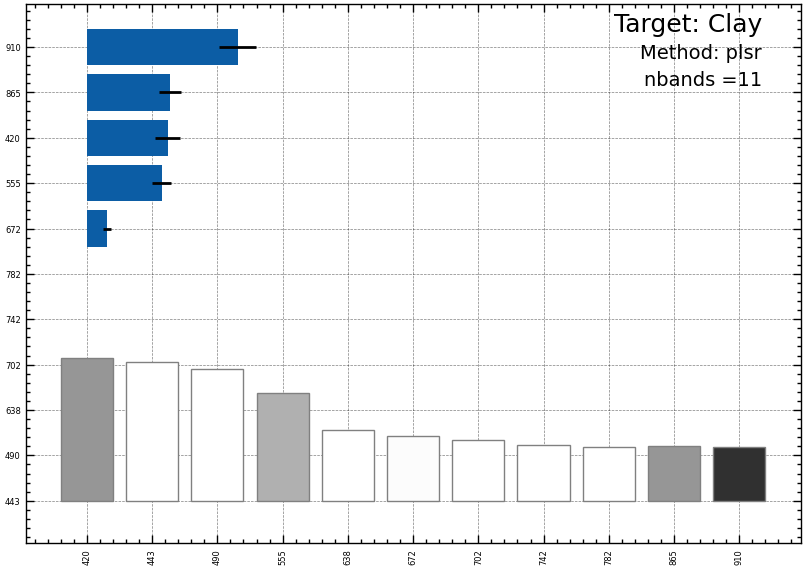

In [39]:
show_important_features_for ('Clay', model_details, feature_scores, 0.7, 1, 2)

### Cubist

Clay -> [ r2 - **0.43**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to the 11 bands provided by Venus.


In [41]:
clay_model_cubist = Cubist( n_committees = 10, n_rules = 10)
clay_model_cubist.fit(fod_sampled11,  T[2])

Cubist(n_committees=10, n_rules=10)

In [42]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, fod_sampled11, T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

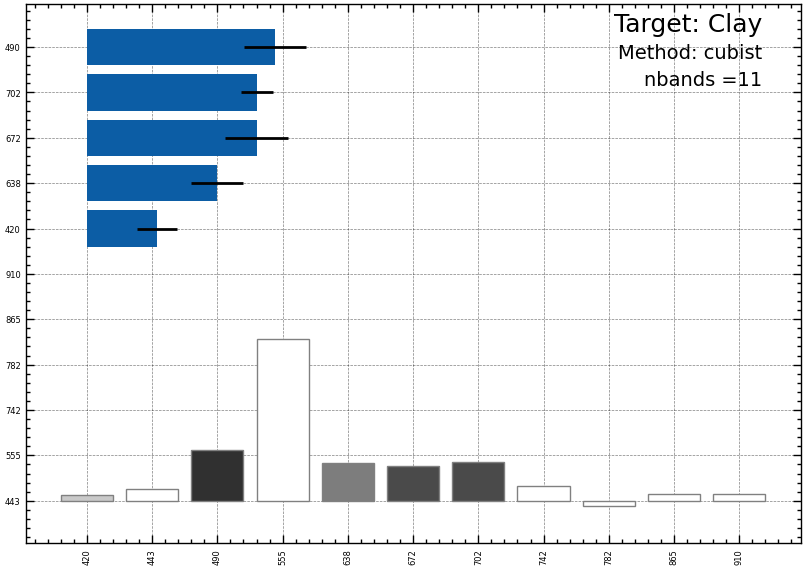

In [46]:
show_important_features_for ('Clay', model_details, feature_scores, 4, 30, 2)

## TOC

{'bp': {'n_committees': 20, 'n_rules': 10},
 'X_test':        420       443       490       555       638       672       702    \
 76  0.022125  0.037200  0.088550  0.094208  0.023229  0.021729  0.025583   
 0   0.006234  0.012102  0.044465  0.085732  0.022833  0.022417  0.027896   
 71  0.019808  0.033575  0.083100  0.090683  0.023417  0.022125  0.026187   
 23  0.006473  0.011812  0.027615  0.043217  0.013146  0.013063  0.016688   
 12  0.015167  0.027200  0.063900  0.084525  0.021625  0.020417  0.025146   
 57  0.044582  0.069901  0.146504  0.120035  0.029208  0.027140  0.028633   
 10  0.033513  0.048650  0.137326  0.120110  0.030344  0.026440  0.031033   
 19  0.016768  0.029034  0.046773  0.052419  0.021294  0.020109  0.024889   
 4   0.008523  0.013047  0.047750  0.068275  0.012250  0.012125  0.014187   
 68  0.040317  0.063521  0.142588  0.129374  0.027300  0.024414  0.026372   
 62  0.011433  0.021275  0.032752  0.040549  0.017695  0.017178  0.023078   
 65  0.013218  0.02283

### SVR

TOC -> [ r2 - **0.42**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra and it is resampled to the 11 bands provided by Venus.


In [48]:
TOC_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf')
TOC_model_svr.fit(sampled_log11,  T[3])

SVR(C=10, gamma=1)

In [49]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log11, T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

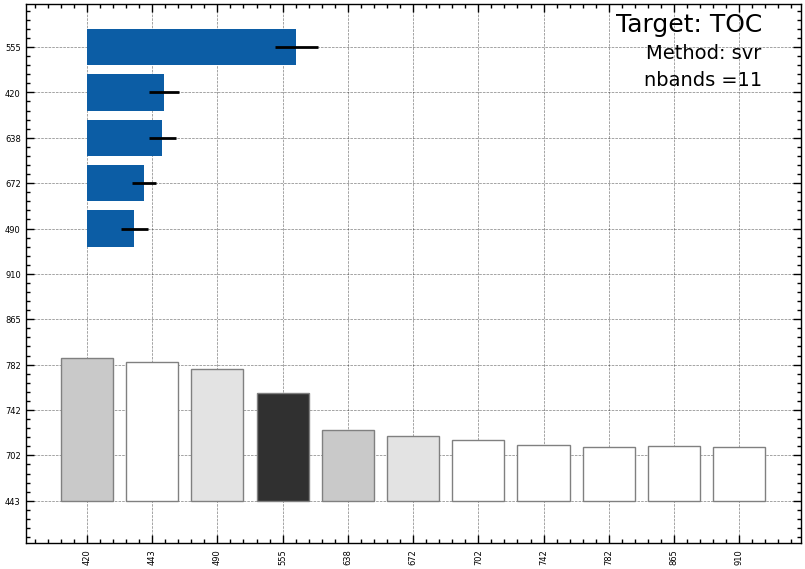

In [52]:
show_important_features_for ('TOC', model_details, feature_scores, 2, 1, 2)

### Cubist

TOC -> [ r2 - **0.44**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the first order derivative  of the smoothed spectra which was  resampled to the 11 bands provided by Venus.


In [54]:
TOC_model_cubist = Cubist(n_committees = 20, n_rules = 10)
TOC_model_cubist.fit(fod_sampled11,  T[3])

Cubist(n_committees=20, n_rules=10)

In [55]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, fod_sampled11, T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

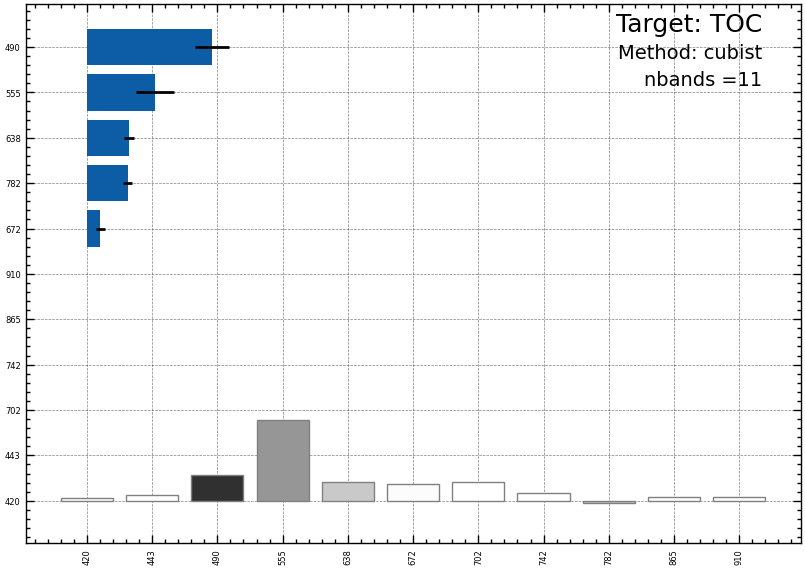

In [57]:
show_important_features_for ('TOC', model_details, feature_scores, 4, 15, 2)

## CaCO3

In [64]:
HMtreeVen['cubist']['CaCO3']['none']['fod2']

{'bp': {'n_committees': 10, 'n_rules': 10},
 'X_test':        420       443       490       555       638       672       702    \
 76  0.022125  0.037200  0.088550  0.094208  0.023229  0.021729  0.025583   
 0   0.006234  0.012102  0.044465  0.085732  0.022833  0.022417  0.027896   
 71  0.019808  0.033575  0.083100  0.090683  0.023417  0.022125  0.026187   
 23  0.006473  0.011812  0.027615  0.043217  0.013146  0.013063  0.016688   
 12  0.015167  0.027200  0.063900  0.084525  0.021625  0.020417  0.025146   
 57  0.044582  0.069901  0.146504  0.120035  0.029208  0.027140  0.028633   
 10  0.033513  0.048650  0.137326  0.120110  0.030344  0.026440  0.031033   
 19  0.016768  0.029034  0.046773  0.052419  0.021294  0.020109  0.024889   
 4   0.008523  0.013047  0.047750  0.068275  0.012250  0.012125  0.014187   
 68  0.040317  0.063521  0.142588  0.129374  0.027300  0.024414  0.026372   
 62  0.011433  0.021275  0.032752  0.040549  0.017695  0.017178  0.023078   
 65  0.013218  0.02283

### PLSR

TOC -> [ r2 - **0.52**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the logarithmic of the reflectance inverse of the smoothed spectra and it is resampled to the 11 bands provided by Venus.


In [59]:
CaCO3_model_plsr = PLSRegression(n_components=3, scale=True)
CaCO3_model_plsr.fit(sampled_log11,  T[4])

PLSRegression(n_components=3)

In [60]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_log11, T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

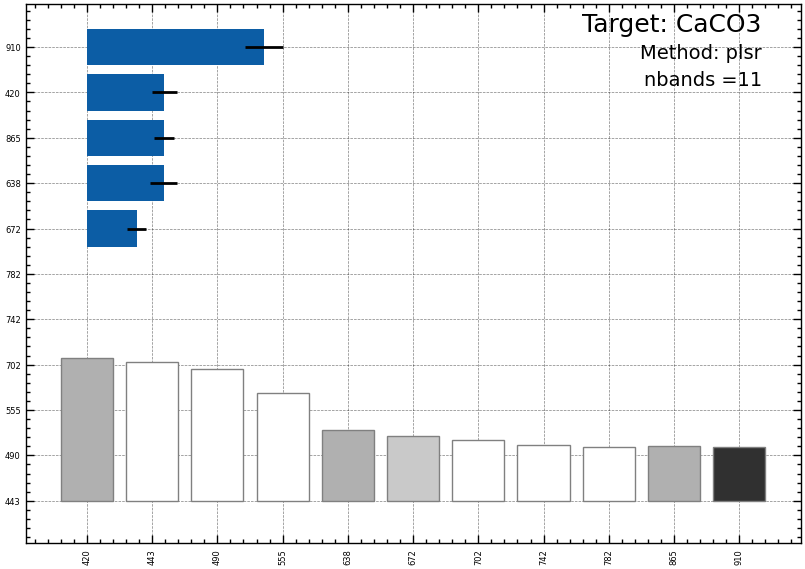

In [63]:
show_important_features_for ('CaCO3', model_details, feature_scores, 2, 1, 2)

### Cubist

CaCO3 -> [ r2 - **0.51**, Spec - fod2, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which was resampled to the 11 bands provided by Venus.


In [65]:
CaCO3_model_cubist =Cubist(n_committees = 10, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled11,  T[4])

Cubist(n_committees=10, n_rules=10)

In [66]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled11, T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod2', 'n_bands': 11}

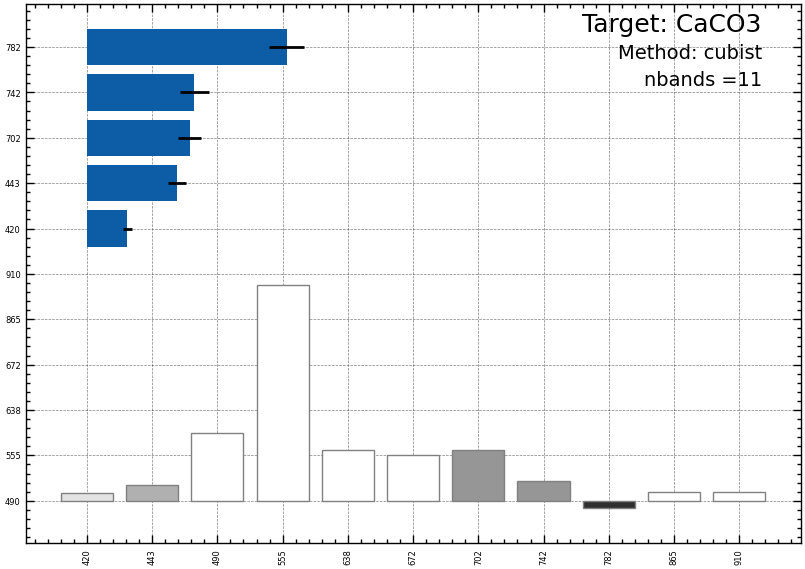

In [71]:
show_important_features_for ('CaCO3', model_details, feature_scores, 2, 40, 2)